Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [54]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv("Automobile_insurance_fraud.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328,228,134,256,228,256,137,165,27,212,...,286,257,94,124,141,3,285,130,458,456
age,48,42,29,41,44,39,34,37,33,42,...,43,44,26,28,30,38,41,34,62,60
policy_number,521585,342868,687698,227811,367455,104594,413978,429027,485665,636550,...,663190,109392,215278,674570,681486,941851,186934,918516,533940,556080
policy_bind_date,17-10-2014,27-06-2006,06-09-2000,25-05-1990,06-06-2014,12-10-2006,04-06-2000,03-02-1990,05-02-1997,25-07-2011,...,05-02-1994,12-07-2006,24-10-2007,08-12-2001,24-03-2007,16-07-1991,05-01-2014,17-02-2003,18-11-2011,11-11-1996
policy_state,OH,IN,OH,IL,IL,OH,IN,IL,IL,IL,...,IL,OH,IN,OH,IN,OH,IL,OH,IL,OH
policy_csl,250/500,250/500,100/300,250/500,500/1000,250/500,250/500,100/300,100/300,100/300,...,100/300,100/300,100/300,250/500,500/1000,500/1000,100/300,250/500,500/1000,250/500
policy_deductable,1000,2000,2000,2000,1000,1000,1000,1000,500,500,...,500,1000,500,1000,1000,1000,1000,500,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0,5000000,5000000,6000000,6000000,0,0,0,0,0,...,3000000,0,0,0,0,0,0,3000000,5000000,0
insured_zip,466132,468176,430632,608117,610706,478456,441716,603195,601734,600983,...,477644,433981,433696,443567,430665,431289,608177,442797,441714,612260


Load the datasets.

In [56]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Above is the list of all columns

In [57]:
df.shape

(1000, 40)

Our dataset has 1000 row and 40 columns

In [58]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Our dataset is mixture of object , integer and float type of data

In [59]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

droping _c39 columns.also droping policy no which is not required for further analysis.

In [60]:
df.drop('_c39', axis=1, inplace=True)
#dropped column _c39.

#also policy_number is not required for further analysis
df.drop('policy_number', axis=1, inplace=True)

now check visualization technique with the help of heatmap.

<AxesSubplot:>

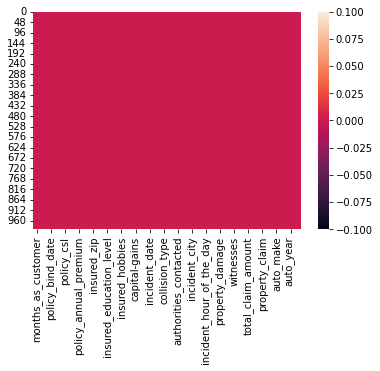

In [61]:
sns.heatmap(df.isnull())

we have not null values present in our datasets

In [62]:
df.nunique()

months_as_customer              391
age                              46
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries             

We already have column name months_as_customer which tells us policy tenured of insured hence we can drop column policy_bind_date.

In [63]:
df.drop('policy_bind_date', axis=1, inplace=True)

Also we saw some ? in some columns. Lets see the value counts for those columns:

In [64]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [65]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [66]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

For collision_type, we will replace it with mode of the column with is 'Rear Collision' however we cannot replace it with mode for other columns as mode of those columns is ? we will replace it with next highest value count which is 'No' for both the columns.

In [67]:
df['collision_type']=df['collision_type'].replace(to_replace="?", value=df['collision_type'].mode()[0])
df['property_damage']=df['property_damage'].replace(to_replace="?", value='NO')
df['police_report_available']=df['police_report_available'].replace(to_replace="?", value='NO')

Let's look at the data in detail for further analysis

In [68]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 3
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 2
police_report_available : 2
auto_make : 14
auto_model : 39
fraud_reported : 2


In [69]:
# lets make a list first
list = ['policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city', 'incident_location']
# now lets drop the columns which are there in the list
df = df.drop(list, axis = 1)

# Let's do Visualization:

In [70]:
#lets make a list of categoical columns first
cat_col=[]
for i in df:
    if df[i].dtype == 'object':
        cat_col.append(i)
        
print(cat_col)

['insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


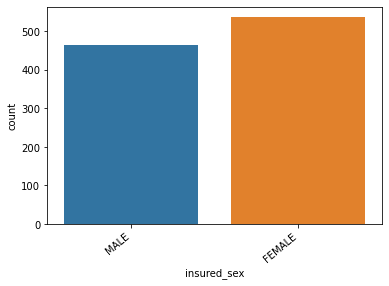

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


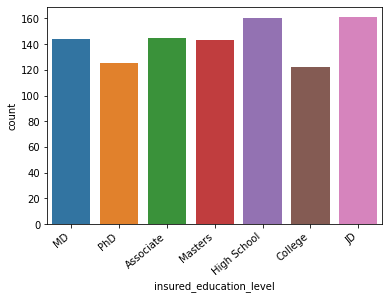

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


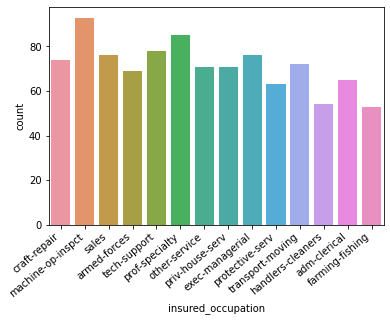

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


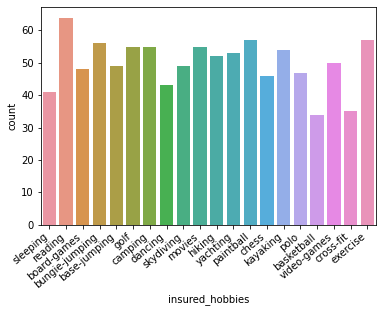

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


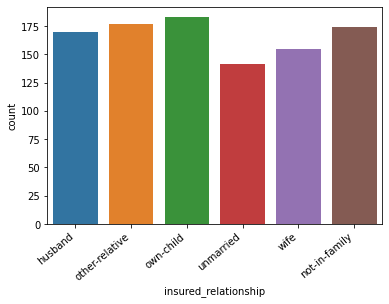

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


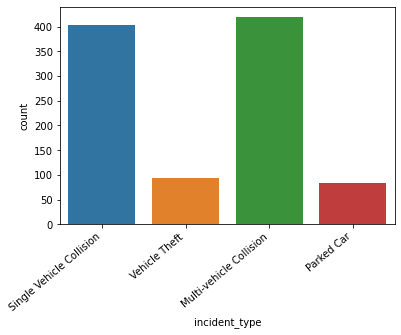

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


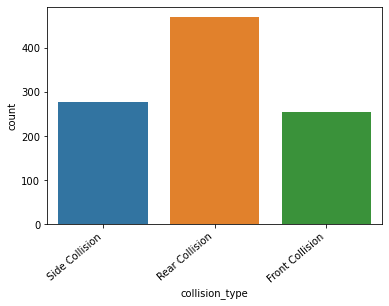

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


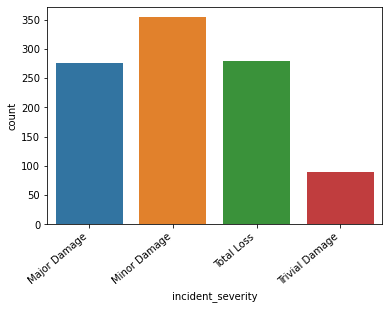

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


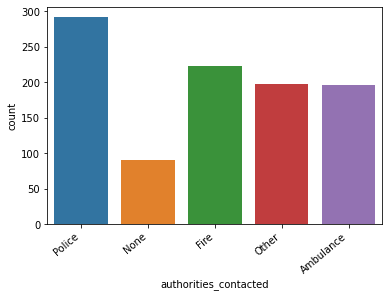

NO     698
YES    302
Name: property_damage, dtype: int64


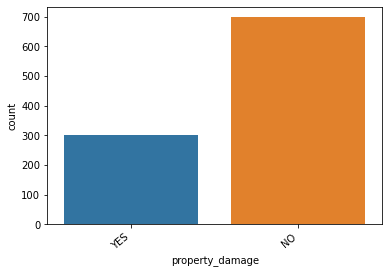

NO     686
YES    314
Name: police_report_available, dtype: int64


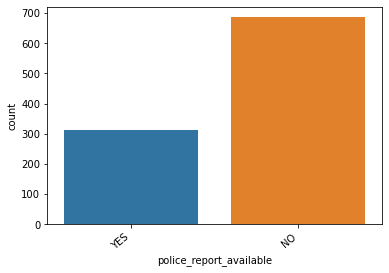

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


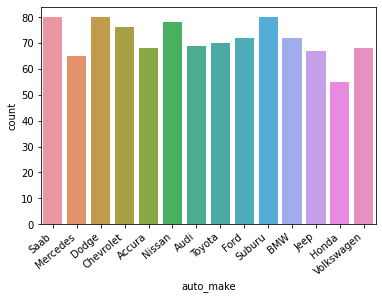

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


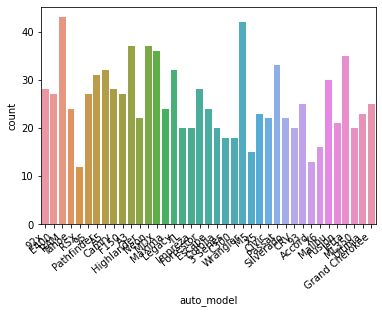

N    753
Y    247
Name: fraud_reported, dtype: int64


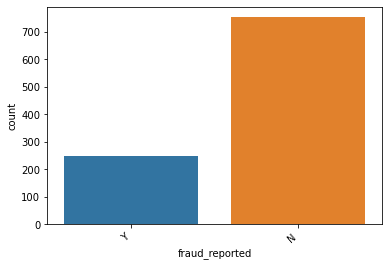

In [71]:
for i in cat_col:
    plt.figure()
    a=sns.countplot(df[i])
    print(df[i].value_counts())
    a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
    plt.show()

 fraud_reported is our target columns.so we need to balance our target columns . try to imbalace technique.
 
 Let's comapre categorical columns with our target column:

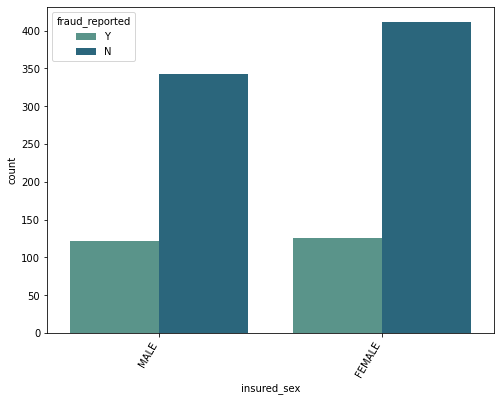

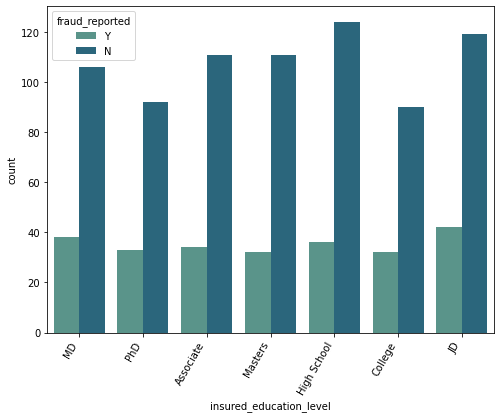

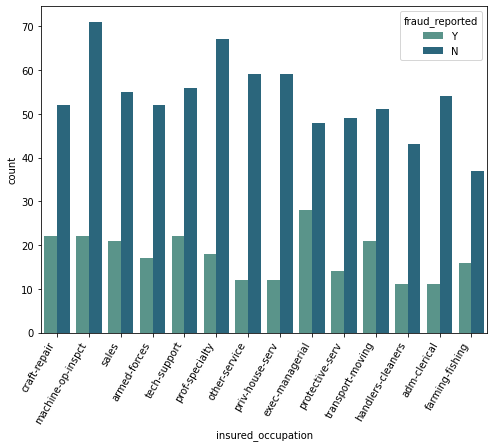

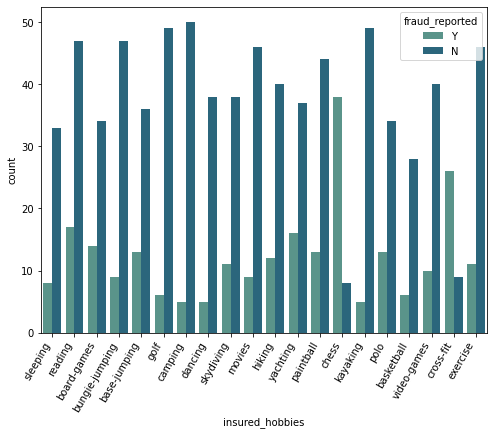

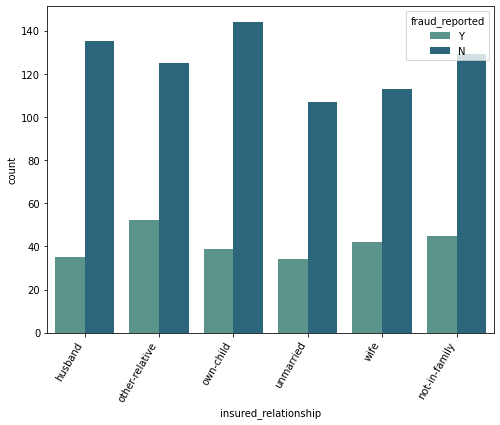

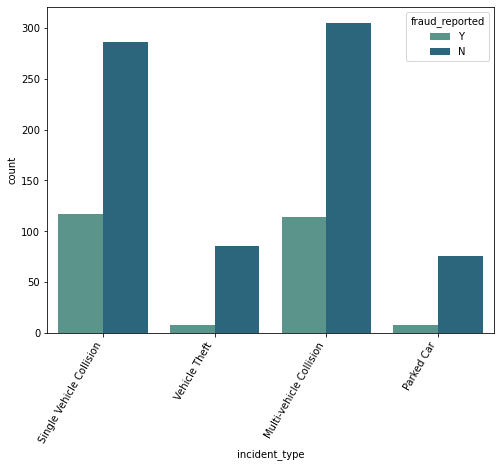

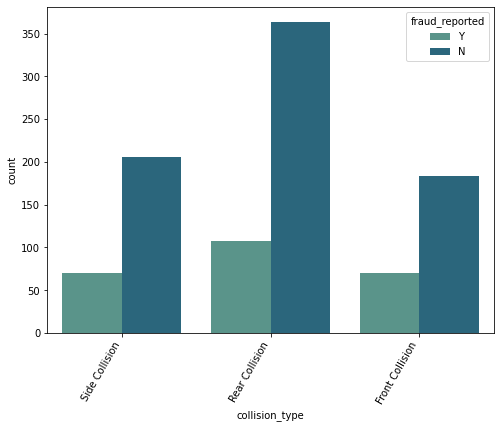

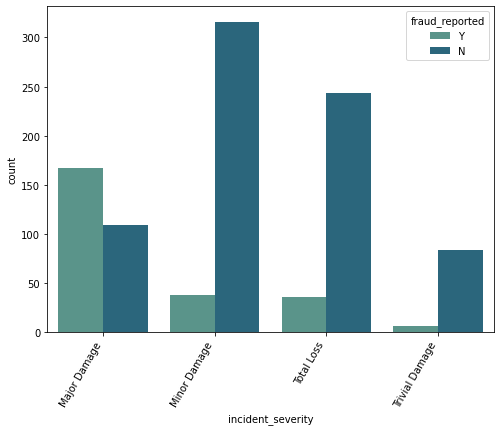

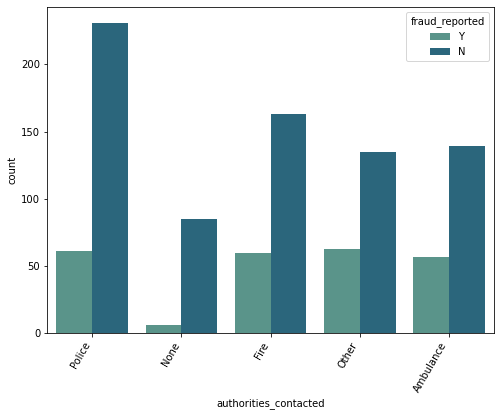

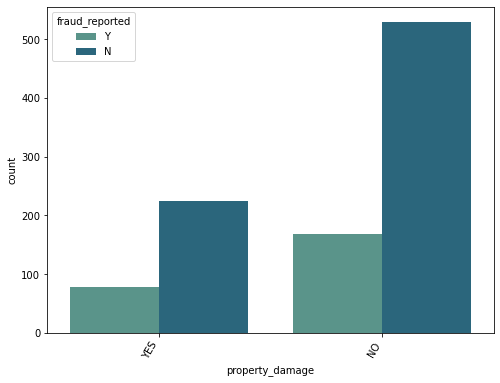

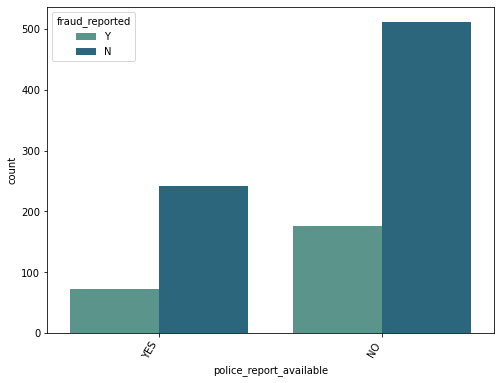

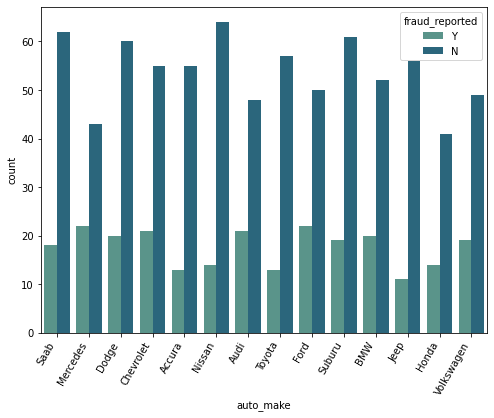

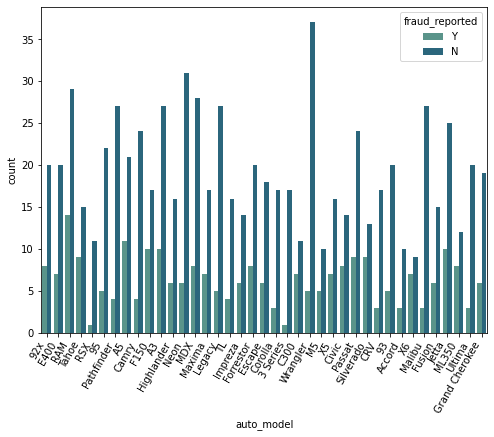

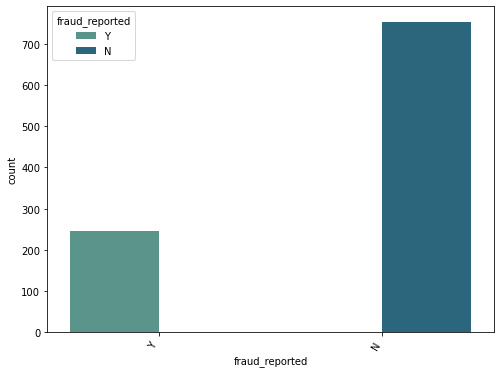

In [72]:
for i in cat_col:
    plt.figure(figsize=(8,6))
    a=sns.countplot(df[i],hue=df['fraud_reported'],palette='crest')
    a.set_xticklabels(a.get_xticklabels(), rotation=60, ha="right")
    plt.show()

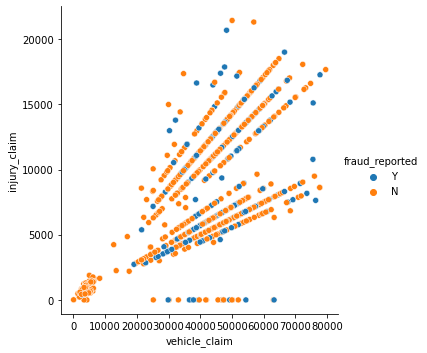

In [73]:
 sns.relplot(x='vehicle_claim',y='injury_claim',hue='fraud_reported',data=df,kind='scatter')

We can positive relationship between injury claim and vehicle claim, also we can see fraude reported for high range of claim too.

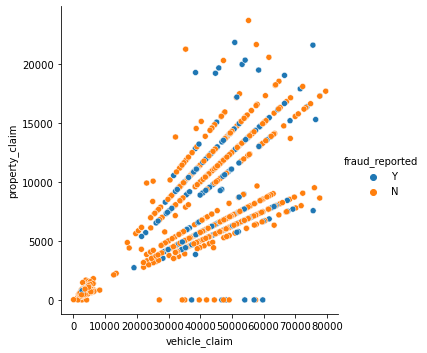

In [74]:
sns.relplot(x='vehicle_claim',y='property_claim',hue='fraud_reported',data=df,kind='scatter')


We can positive relationship between property claim and vehicle claim, also we can see fraude reported for high range of claim too.

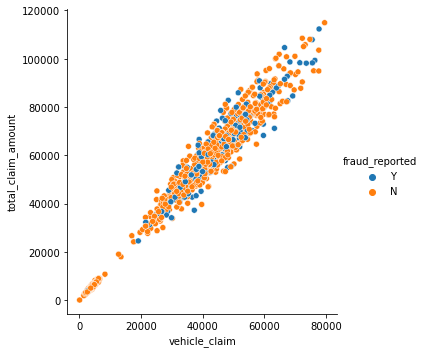

In [75]:
sns.relplot(x='vehicle_claim',y='total_claim_amount',hue='fraud_reported',data=df,kind='scatter')

We can positive relationship between total claim amount claim and vehicle claim, also we can see fraude reported for high range of claim too.

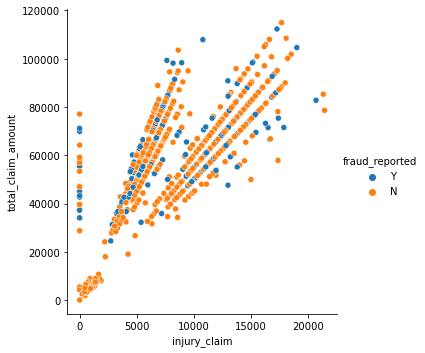

In [76]:
sns.relplot(x='injury_claim',y='total_claim_amount',hue='fraud_reported',data=df,kind='scatter')

We can positive relationship between injury claim and total claim amount, also we can see fraude reported for high range of claim too.

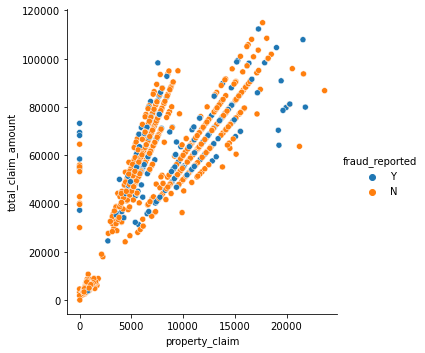

In [77]:
sns.relplot(x='property_claim',y='total_claim_amount',hue='fraud_reported',data=df,kind='scatter')

We can positive relationship between property claim and total amount claim, also we can see fraude reported for high range of claim too.

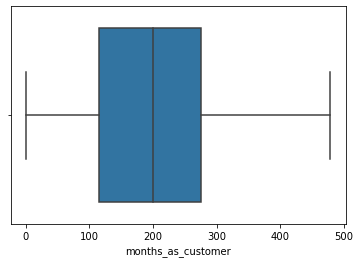

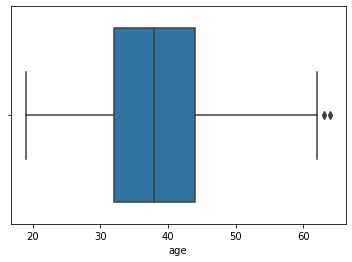

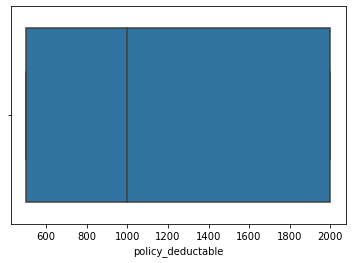

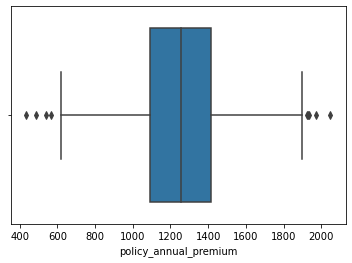

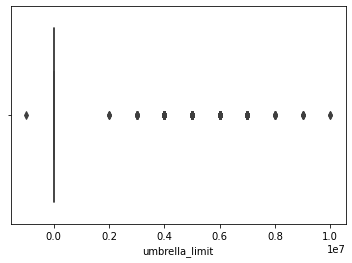

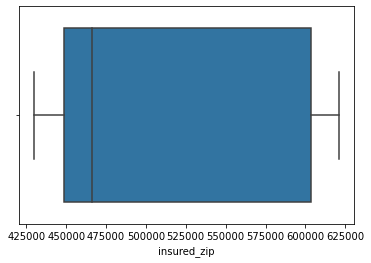

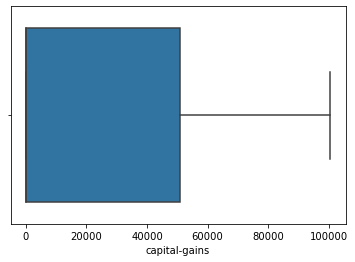

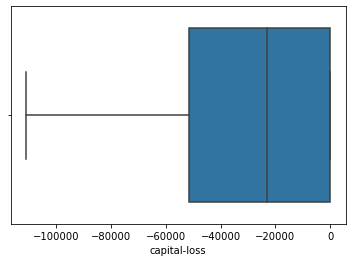

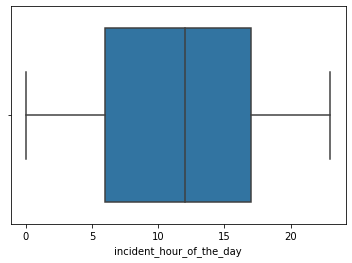

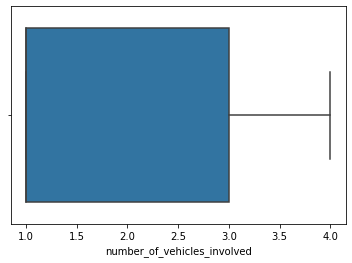

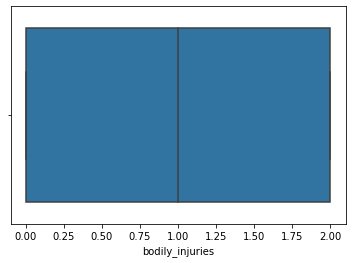

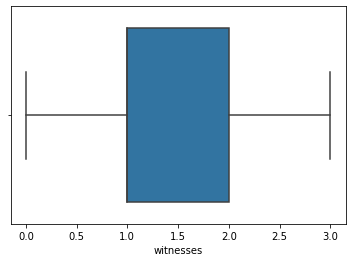

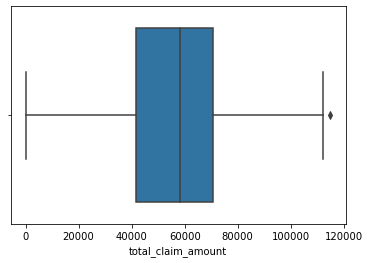

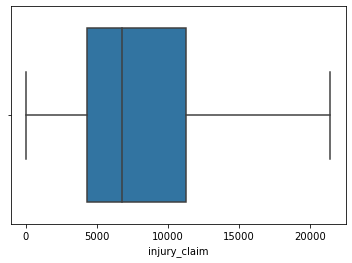

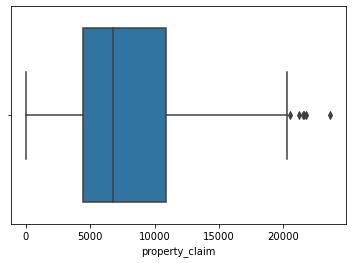

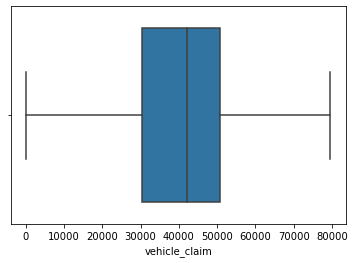

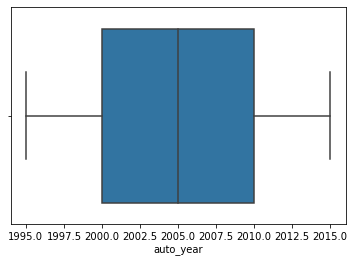

In [78]:
for i in df.columns:
        if df[i].dtype != 'object':
            plt.figure()
            sns.boxplot(x=df[i])

we can see outliers are present in your datasets.

# Encoding:

In [79]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [80]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328.00,228.00,134.00,256.00,228.00,256.0,137.00,165.00,27.00,212.00,...,286.00,257.00,94.00,124.00,141.00,3.0,285.00,130.00,458.00,456.00
age,48.00,42.00,29.00,41.00,44.00,39.0,34.00,37.00,33.00,42.00,...,43.00,44.00,26.00,28.00,30.00,38.0,41.00,34.00,62.00,60.00
policy_deductable,1000.00,2000.00,2000.00,2000.00,1000.00,1000.0,1000.00,1000.00,500.00,500.00,...,500.00,1000.00,500.00,1000.00,1000.00,1000.0,1000.00,500.00,2000.00,1000.00
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0.00,5000000.00,5000000.00,6000000.00,6000000.00,0.0,0.00,0.00,0.00,0.00,...,3000000.00,0.00,0.00,0.00,0.00,0.0,0.00,3000000.00,5000000.00,0.00
insured_zip,466132.00,468176.00,430632.00,608117.00,610706.00,478456.0,441716.00,603195.00,601734.00,600983.00,...,477644.00,433981.00,433696.00,443567.00,430665.00,431289.0,608177.00,442797.00,441714.00,612260.00
insured_sex,1.00,1.00,0.00,0.00,1.00,0.0,1.00,1.00,0.00,1.00,...,0.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,1.00,0.00
insured_education_level,4.00,4.00,6.00,6.00,0.00,6.0,6.00,0.00,6.00,6.00,...,4.00,4.00,4.00,4.00,2.00,5.0,6.00,5.00,0.00,0.00
insured_occupation,2.00,6.00,11.00,1.00,11.00,12.0,9.00,12.00,7.00,8.00,...,9.00,7.00,3.00,3.00,11.00,2.0,9.00,1.00,5.00,11.00
insured_hobbies,17.00,15.00,2.00,2.00,2.00,3.0,2.00,0.00,9.00,4.00,...,12.00,1.00,4.00,4.00,3.00,13.0,17.00,3.00,0.00,11.00


after performing ordinalencoding , all datasets are transfer to numeric format

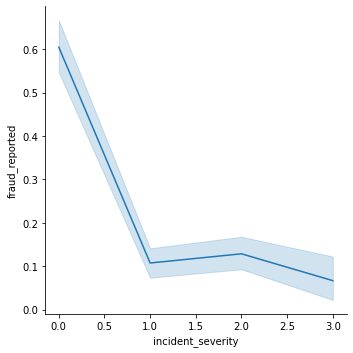

In [81]:
sns.relplot(x='incident_severity',y='fraud_reported',data=df,kind='line')

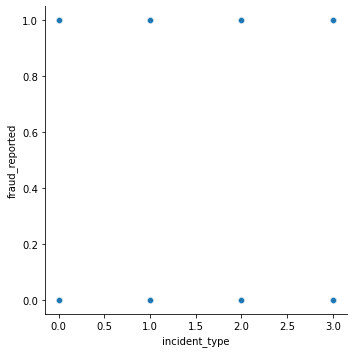

In [82]:
sns.relplot(x='incident_type',y='fraud_reported',data=df,kind='scatter')

For all type incidents we have fraud cases and genuine cases too.

# Let's Describe our datasets:

In [83]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


lets check its with visualization

<AxesSubplot:>

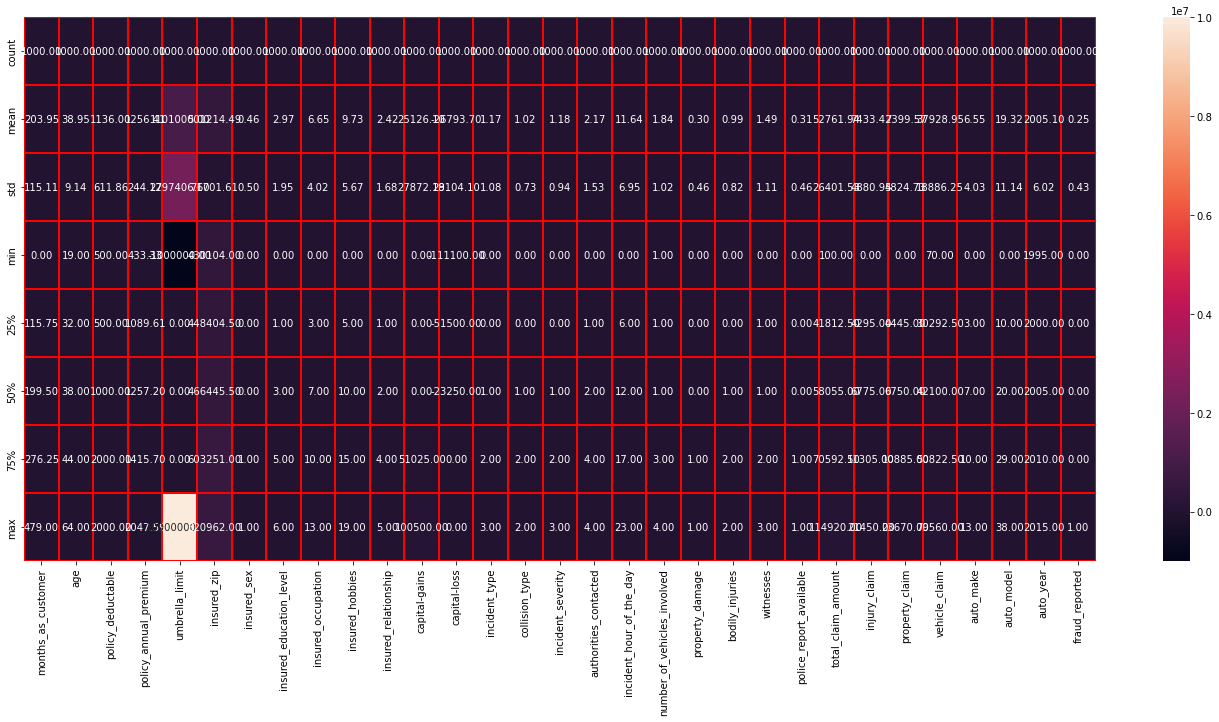

In [84]:
plt.figure(figsize=(24,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [85]:
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,...,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,0.021807,...,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.046733,0.035922,0.023422,-0.069077,-0.006160,-0.020298,1.000000,-0.011077,...,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564
insured_hobbies,-0.093661,-0.081315,0.004061,-0.018019,-0.037000,0.002106,-0.020317,0.021807,-0.011077,1.000000,...,-0.033971,-0.027937,-0.004488,0.028393,0.012535,-0.016814,0.001525,0.030948,-0.014495,-0.046838


<AxesSubplot:>

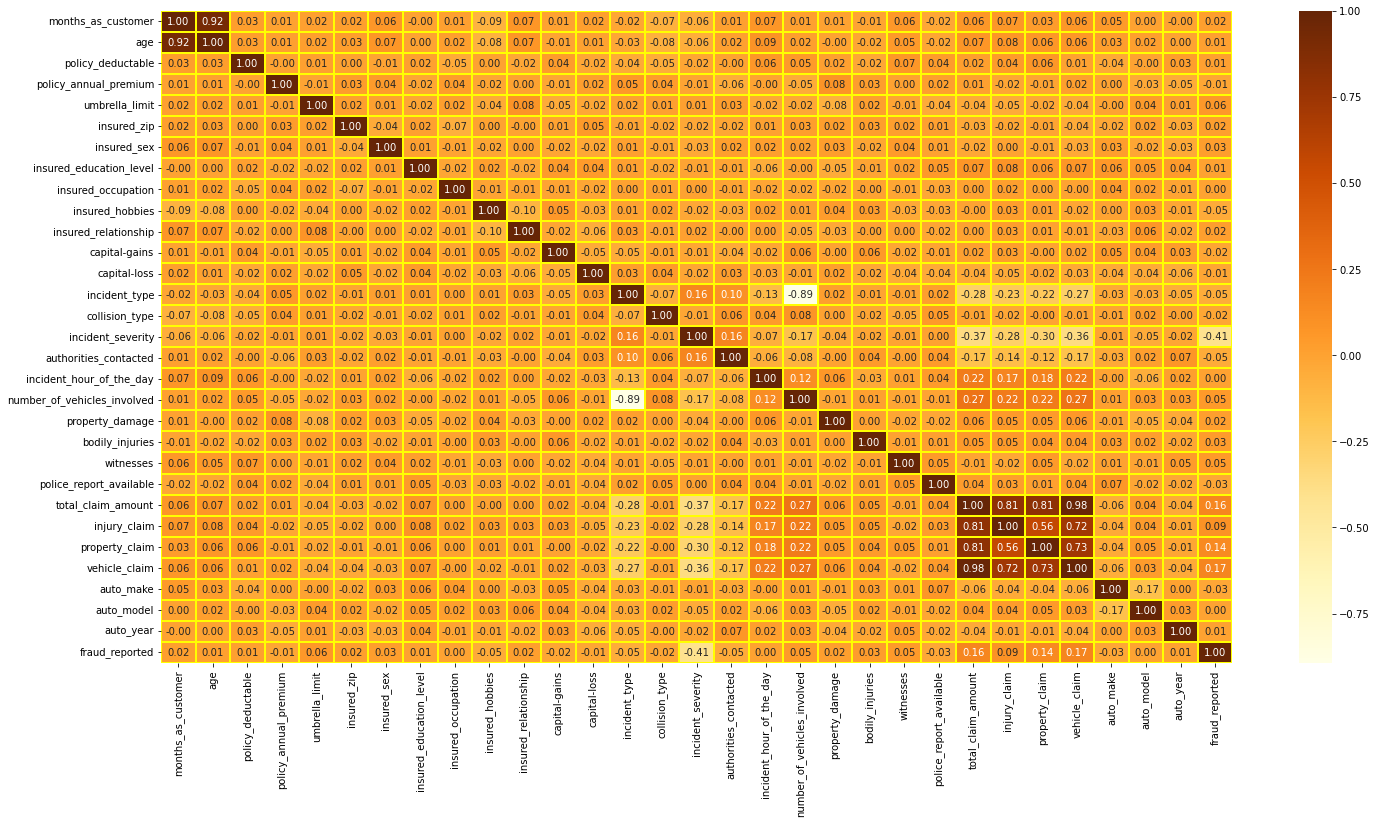

In [86]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="yellow",fmt="0.2f",cmap="YlOrBr")

Checking the columns which are positively and negative correlated with the target columns:

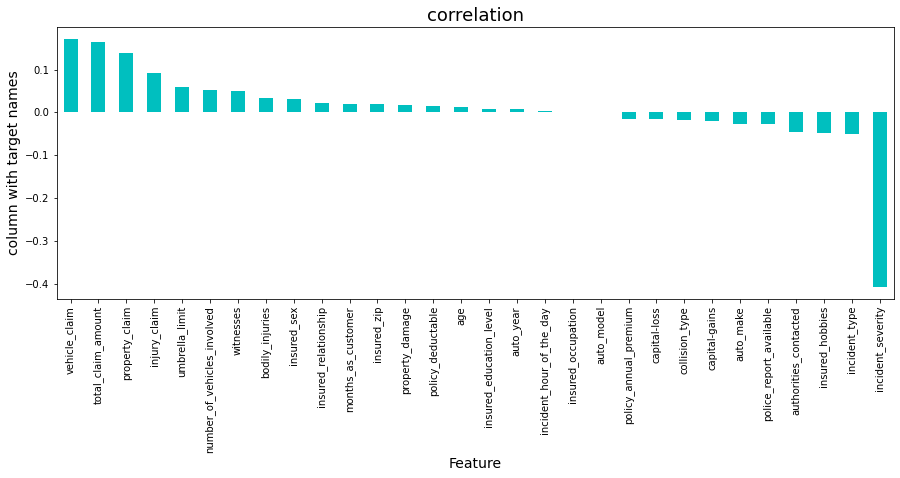

In [87]:
plt.figure(figsize=(15,5))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

above figure ['policy_deductable', 'age','insured_education_level','auto_year','incident_hour_of_the_day',
      'insured_occupation','auto_model','policy_annual_premium','capital-loss'] these are the very less correlation with the target column fraud_reported.so we need to drop these columns.

In [88]:
list=['policy_deductable', 'age','insured_education_level','auto_year','incident_hour_of_the_day',
      'insured_occupation','auto_model','policy_annual_premium','capital-loss']

df.drop(list, axis=1, inplace=True)

# Skewness and outliers removal:

In [89]:
df.skew()

months_as_customer             0.362177
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_make                     -0.018797
fraud_reported                 1.175051
dtype: float64

we have some skew data in our datasets.try to remove this

In [90]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 500, 503, 657, 700,
        875, 922, 975], dtype=int64),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, 18,  1,  1,  1,  1,  1,  1],
       dtype=int64))

In [91]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,umbrella_limit,insured_zip,insured_sex,insured_hobbies,insured_relationship,capital-gains,incident_type,collision_type,incident_severity,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,0,466132,1.0,17.0,0.0,53300,2.0,2.0,0.0,...,1.0,1,2,1.0,71610,6510,13020,52080,10.0,1.0
1,228,5000000,468176,1.0,15.0,2.0,0,3.0,1.0,1.0,...,0.0,0,0,0.0,5070,780,780,3510,8.0,1.0
2,134,5000000,430632,0.0,2.0,3.0,35100,0.0,1.0,1.0,...,0.0,2,3,0.0,34650,7700,3850,23100,4.0,0.0
3,256,6000000,608117,0.0,2.0,4.0,48900,2.0,0.0,0.0,...,0.0,1,2,0.0,63400,6340,6340,50720,3.0,1.0
4,228,6000000,610706,1.0,2.0,4.0,66000,3.0,1.0,1.0,...,0.0,0,1,0.0,6500,1300,650,4550,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,431289,0.0,13.0,4.0,0,2.0,0.0,1.0,...,1.0,0,1,0.0,87200,17440,8720,61040,6.0,0.0
996,285,0,608177,0.0,17.0,5.0,70900,2.0,1.0,0.0,...,1.0,2,3,0.0,108480,18080,18080,72320,13.0,0.0
997,130,3000000,442797,0.0,3.0,2.0,35100,0.0,2.0,1.0,...,0.0,2,3,1.0,67500,7500,7500,52500,11.0,0.0
998,458,5000000,441714,1.0,0.0,5.0,0,2.0,1.0,0.0,...,0.0,0,1,1.0,46980,5220,5220,36540,1.0,0.0


now removing all outliers

In [92]:
df_new.shape

(984, 22)

In [93]:
df.shape

(1000, 22)

In [94]:
#Percentage data loss:
loss_percent=(1000-984)/1000*100
print(loss_percent)

1.6


We have lost 1.6% data from our database.

In [95]:
x=df_new.drop('fraud_reported', axis=1)
y=df_new['fraud_reported']
print(x.shape)
print(y.shape)

(984, 21)
(984,)


In [96]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

We have tried to reduce skewness by performing power transform method. Let's check the skewness now.

In [97]:
df_new.skew()

months_as_customer            -0.132370
umbrella_limit                -7.960483
insured_zip                    0.000000
insured_sex                    0.142856
insured_hobbies               -0.247332
insured_relationship          -0.160455
capital-gains                  0.027296
incident_type                 -0.094202
collision_type                -0.128346
incident_severity             -0.078807
authorities_contacted         -0.222752
number_of_vehicles_involved    0.371389
property_damage                0.859457
bodily_injuries               -0.132164
witnesses                     -0.153724
police_report_available        0.797542
total_claim_amount            -0.510286
injury_claim                  -0.417510
property_claim                -0.358400
vehicle_claim                 -0.523054
auto_make                     -0.230510
dtype: float64

skewness reduce almost.

# Let's perform scaling now:

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df_new)

array([[ 1.04761219, -0.33610349,  0.        , ...,  1.08929894,
         0.75778853,  0.85455821],
       [ 0.30235945,  1.48569626,  0.        , ..., -1.56346213,
        -1.78682327,  0.41280434],
       [-0.51299886,  1.48569626,  0.        , ..., -0.58264027,
        -0.82022527, -0.56162319],
       ...,
       [-0.55149913,  0.84245782,  0.        , ...,  0.18555523,
         0.78138468,  1.06736378],
       [ 1.90624532,  1.48569626,  0.        , ..., -0.26856948,
        -0.10222206, -1.44414606],
       [ 1.89373801, -0.33610349,  0.        , ..., -1.49890163,
        -1.7792854 ,  0.41280434]])

In [99]:
x=df_new #assigned to x again

# class imbalancement:

In [100]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)

In [101]:
y.value_counts()

1.0    743
0.0    743
Name: fraud_reported, dtype: int64

now our target columns is balanced

# Finding Best RandomState:

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [103]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.8959731543624161  on Random State  102


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [105]:
model=[LogisticRegression(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.8154362416107382
[[126  21]
 [ 34 117]]
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       147
         1.0       0.85      0.77      0.81       151

    accuracy                           0.82       298
   macro avg       0.82      0.82      0.82       298
weighted avg       0.82      0.82      0.82       298



Accuracy Score of SVC() is: 0.8624161073825504
[[127  20]
 [ 21 130]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       147
         1.0       0.87      0.86      0.86       151

    accuracy                           0.86       298
   macro avg       0.86      0.86      0.86       298
weighted avg       0.86      0.86      0.86       298



Accuracy Score of AdaBoostClassifier() is: 0.8758389261744967
[[134  13]
 [ 24 127]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88    

Lets check cross validation for better accuracy score

# Cross Validation:

In [106]:
model=[LogisticRegression(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for ",m," is : ",score.mean())

Score for  LogisticRegression()  is :  0.7644905430140329
Score for  SVC()  is :  0.8270851693670485
Score for  AdaBoostClassifier()  is :  0.8479967459833231
Score for  RandomForestClassifier()  is :  0.8782681400131065
Score for  DecisionTreeClassifier()  is :  0.8398888210968748


With RandomForestClassifier model there is very less difference in accuracy and cross validation score, Hence the best model is RandomForestClassifier.

# AUC-ROC CURVE:

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [109]:
model=[LogisticRegression(),SVC(probability=True),AdaBoostClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    y_pred_prob=m.predict_proba(x_test)[:,1]    
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')

AUC Score of LogisticRegression()
0.8159886471144749


AUC Score of SVC(probability=True)
0.8624363652745866


AUC Score of AdaBoostClassifier()
0.8763121142496734


AUC Score of RandomForestClassifier()
0.8962697661846196


AUC Score of DecisionTreeClassifier()
0.8961796639185475




as we can see that the AUC score of RandomForestClassifier is best. now we are Plotting roc_auc curve with the help of TPR(TRUE POSITIVE RATE) & FPR(FALSE POSITIVE RATE)

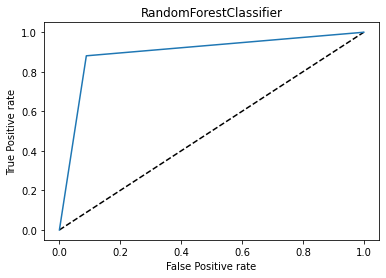

In [110]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('RandomForestClassifier')
plt.show()

# Hyperparameter Training:

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
parameters = {'max_depth':np.arange(2,10),
             'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,3,4]}

In [113]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [114]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]})

In [115]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 2}

In [116]:
Final_mod= RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",min_samples_split=2)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

88.9261744966443


After hyperparamete tuning,we are getting best accuracy 88.92%

# Saving the best Model:

In [117]:
import pickle
filename= 'Insurance_claims_prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [118]:
#load the model from the disk

loaded_model = pickle.load(open('Insurance_claims_prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.889261744966443


In [119]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
Predicted,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
Orginal,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [120]:
#end